In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df_enusc = pd.read_csv("../data/base-usuario-20-enusc-2023.csv")

In [26]:
print(df_enusc.dtypes)

rph_ID                    object
idhogar                   object
enc_idr                    int64
enc_region                 int64
enc_rpc                    int64
                          ...   
Fact_Hog_Com             float64
Fact_Hog_Reg             float64
Fact_Hog_Regional_102    float64
VarStrat                 float64
Conglomerado             float64
Length: 1301, dtype: object


In [27]:
def bar_plot(data, labels, title, xlabel, ylabel, color='skyblue', width=0.4):
    """
    Crea un grafico de barras.

    Args:
        data: Lista o array con los valores de las barras.
        labels: Lista o array con las etiquetas de las barras.
        title: Titulo del gráfico.
        xlabel: Etiqueta del eje x.
        ylabel: Etiqueta del eje y.
        color: Color de las barras (opcional, predeterminado 'skyblue').
        width: Ancho de las barras (opcional, predeterminado 0.4).
    """

    # Validar que labels y data tengan la misma longitud
    if len(labels) != len(data):
        raise ValueError("La longitud de 'labels' debe ser igual a la longitud de 'data'.")

    plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
    plt.bar(range(len(data)), data, color=color, width=width)

    # Agregar título y etiquetas de los ejes
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Configurar las etiquetas del eje x
    plt.xticks(range(len(data)), labels, rotation=45)

    # Agregar valores sobre las barras
    for i, v in enumerate(data):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

## Percepcion de Aumento inseguridad

### Percepcion de Aumento inseguridad nivel `Pais`

P_AUMENTO_PAIS
1.0     44183
2.0      4653
3.0       662
88.0      306
99.0    96490
Name: count, dtype: int64

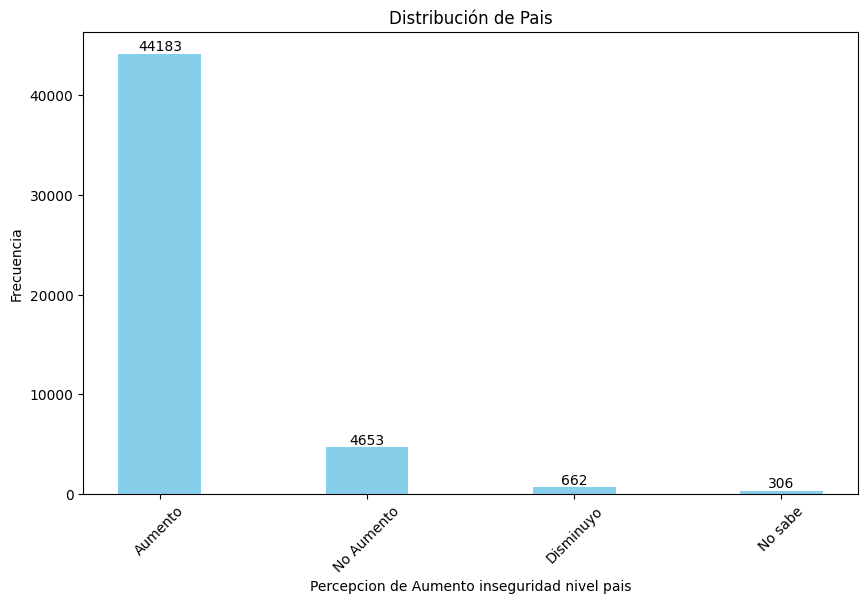

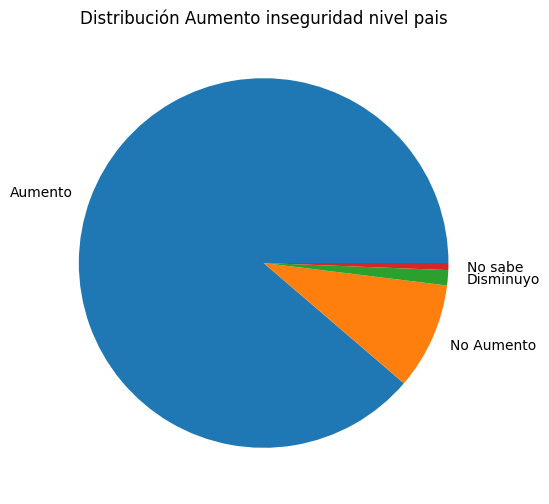

In [28]:
df_pais = df_enusc["P_AUMENTO_PAIS"].fillna(99)

pais_cout = df_pais.value_counts().sort_index()
display(pais_cout)

# Graficos excluye "No responde"
etiquetas = ['Aumento', 'No Aumento', 'Disminuyo', 'No sabe', 'No responde']
title = 'Distribución de Pais'
xlabel = 'Percepcion de Aumento inseguridad nivel pais'
ylabel = 'Frecuencia'
bar_plot(pais_cout.values[:4], etiquetas[:4], title, xlabel, ylabel)

plt.figure(figsize=(10, 6))
plt.pie(pais_cout.values[:4], labels=etiquetas[:4])
plt.title('Distribución Aumento inseguridad nivel pais')
plt.show()

### Percepcion de Aumento inseguridad nivel region: `BioBio`

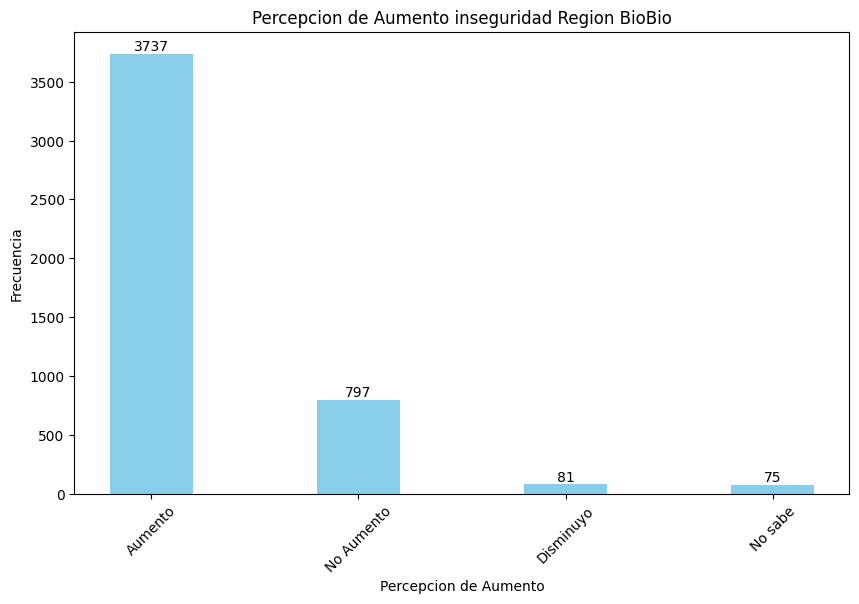

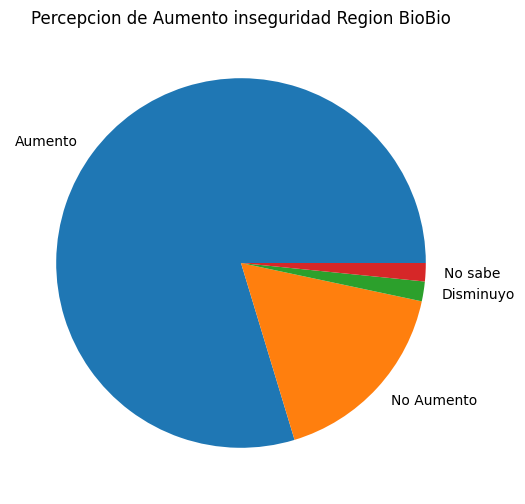

In [29]:
# Seleccion de region BioBio y limpieza de datos 
region_nombre = df_enusc.loc[df_enusc["enc_region"] == 8, "P_AUMENTO_COM"]
region_nombre.fillna(99, inplace=True)
region_count = region_nombre.value_counts().sort_index()


# Graficos excluye "No responde"
etiquetas = ["Aumento", "No Aumento", "Disminuyo", "No sabe", "No responde"]
titulo = 'Percepcion de Aumento inseguridad Region BioBio'
etiqueta_x = 'Percepcion de Aumento'
etiqueta_y = 'Frecuencia'
bar_plot(region_count.values[:4], etiquetas[:4], titulo, etiqueta_x, etiqueta_y)

plt.figure(figsize=(10, 6))
plt.pie(region_count.values[:4], labels=etiquetas[:4])
plt.title('Percepcion de Aumento inseguridad Region BioBio')
plt.show()



### Percepcion de Aumento inseguridad nivel comuna: `Concepcion`

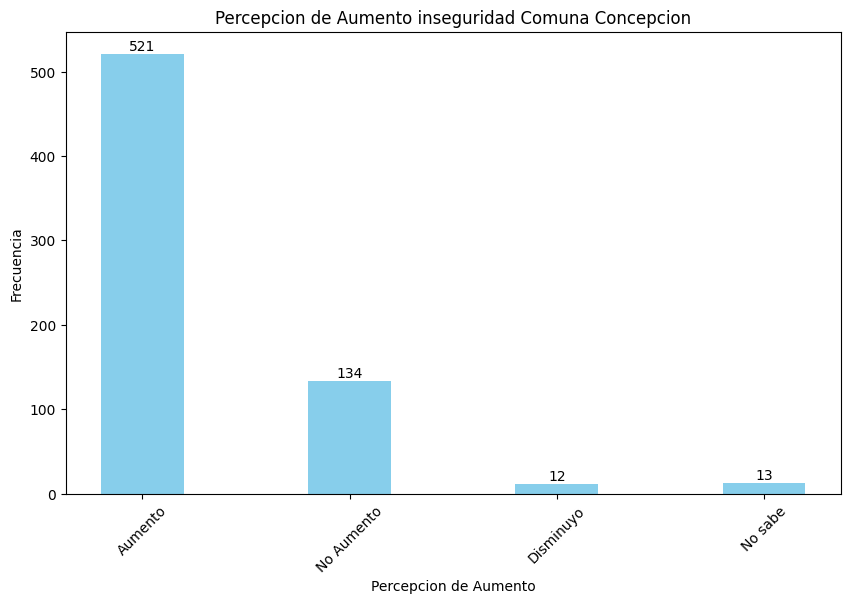

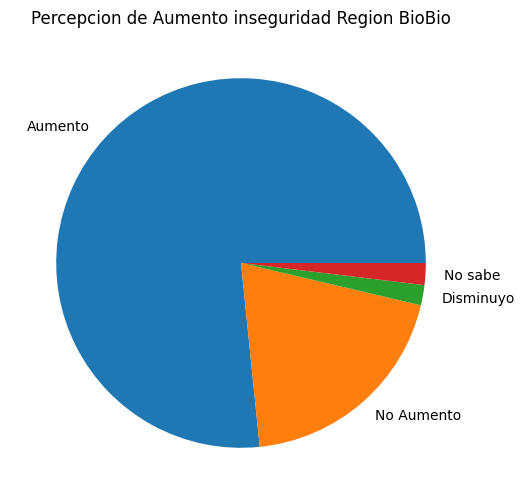

In [30]:
# 
comuna_nombre = df_enusc.loc[df_enusc["enc_rpc"] == 8101, "P_AUMENTO_COM"]
comuna_nombre.fillna(99, inplace=True)
comuna_count = comuna_nombre.value_counts().sort_index()

# Graficos excluye "No responde"
etiquetas = ["Aumento", "No Aumento", "Disminuyo", "No sabe", "No responde"]
titulo = 'Percepcion de Aumento inseguridad Comuna Concepcion'
etiqueta_x = 'Percepcion de Aumento'
etiqueta_y = 'Frecuencia'
bar_plot(comuna_count.values[:4], etiquetas[:4], titulo, etiqueta_x, etiqueta_y)

plt.figure(figsize=(10, 6))
plt.pie(comuna_count.values[:4], labels=etiquetas[:4])
plt.title('Percepcion de Aumento inseguridad Region BioBio')
plt.show()



### Percepcion aumento de inseguridad con edad

             rph_edad P_INSEG_DIA_1
0        50 a 59 años      Seguro/a
5        40 a 49 años      Seguro/a
8        60 a 69 años      Seguro/a
10      70 años o más      Seguro/a
12       60 a 69 años      Seguro/a
...               ...           ...
146280   60 a 69 años      Seguro/a
146283   20 a 29 años    Inseguro/a
146285   20 a 29 años      Seguro/a
146290   20 a 29 años      Seguro/a
146291   50 a 59 años    Inseguro/a

[48826 rows x 2 columns]


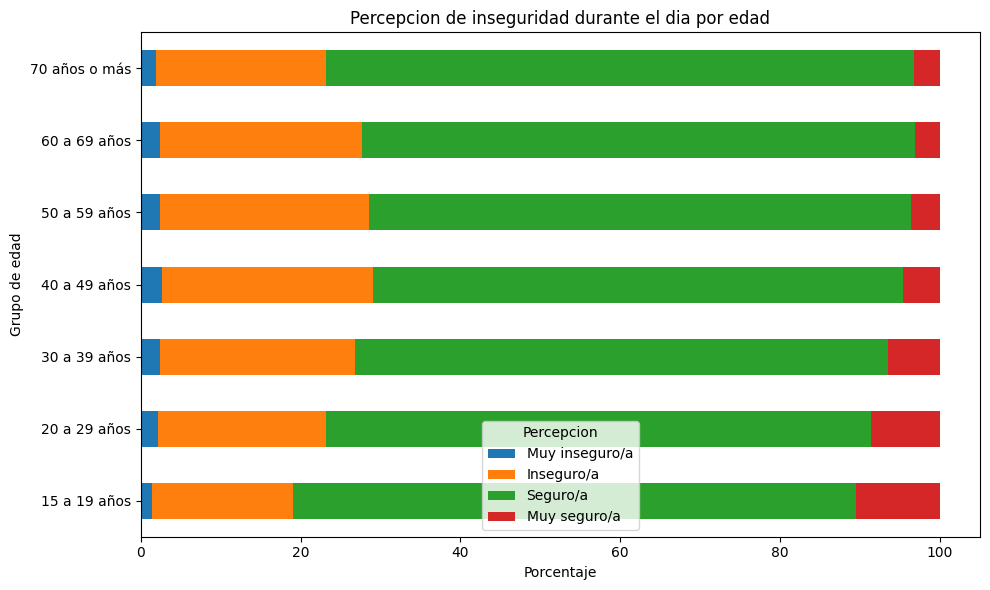

In [31]:
df_pais = df_enusc[["rph_edad", "P_INSEG_DIA_1"]].copy()
# Eliminar filas con valores no deseados
df_pais = df_pais[df_pais["P_INSEG_DIA_1"].isin([1, 2, 3, 4])]

# Renombrar los valores de la columna "rph_edad" con su etiqueta correspondiente
labels = {
    0: "0 a 14 años",
    1: "15 a 19 años",
    2: "20 a 29 años",
    3: "30 a 39 años",
    4: "40 a 49 años",
    5: "50 a 59 años",
    6: "60 a 69 años",
    7: "70 años o más"
}
df_pais["rph_edad"] = df_pais["rph_edad"].replace(labels)

# Renombrar los valores de la columna "P_INSEG_DIA_1" con su etiqueta correspondiente
inseg_labels = {
    1: "Muy inseguro/a",
    2: "Inseguro/a",
    3: "Seguro/a",
    4: "Muy seguro/a"
}
df_pais["P_INSEG_DIA_1"] = df_pais["P_INSEG_DIA_1"].replace(inseg_labels)

print(df_pais)


# Crear tabla de frecuencias cruzadas normalizada por filas (porcentaje)
tabla = pd.crosstab(df_pais["rph_edad"], df_pais["P_INSEG_DIA_1"], normalize='index') * 100

# Ordenar categorias si es necesario
orden_columnas = ["Muy inseguro/a", "Inseguro/a", "Seguro/a", "Muy seguro/a"]
tabla = tabla[orden_columnas]

# Grafico de barras apiladas horizontales
tabla.plot(kind='barh', stacked=True, figsize=(10, 6))

plt.xlabel("Porcentaje")
plt.ylabel("Grupo de edad")
plt.title("Percepcion de inseguridad durante el dia por edad")
plt.legend(title="Percepcion")
plt.tight_layout()
plt.show()


## Categoria: Hackeo de correo o redes sociales (HACK)

### Cantidad de delitos a nivel pais

HACK
0.0    47981
1.0     1832
Name: count, dtype: int64


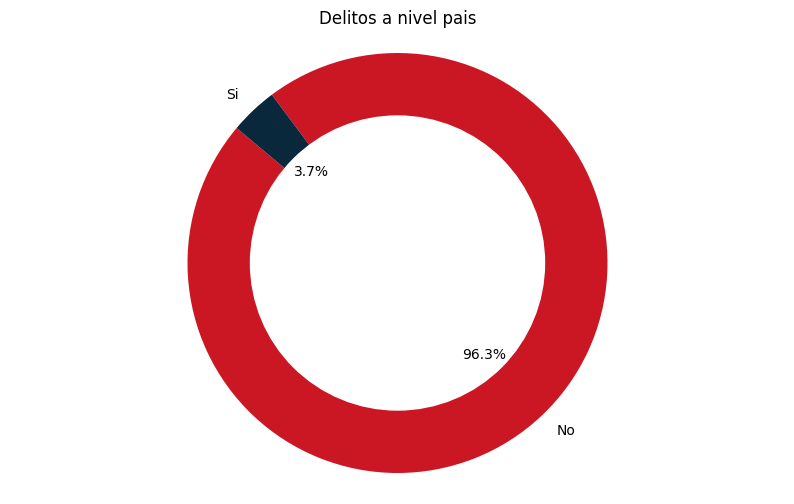

In [32]:
# Cantidad de delitos a nivel pais
# Usamos variable HACK que filtra si el delito fue cometido o no
total_hack_pais = df_enusc["HACK"].value_counts().sort_index()
# print(df_enusc["HACK"].isna().sum())
print(total_hack_pais)

labels = ["No", "Si"]
title = 'Delitos a nivel pais' 

# crear grafico de torta
plt.figure(figsize=(10, 6))
plt.pie(total_hack_pais.values, labels=labels, autopct='%1.1f%%', colors={"#09283CFF", "#CB1724FF"}, startangle=140)
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.axis('equal')
plt.title(title)
plt.show()

### Creacion DataFrame HACK



In [33]:
# Limpieza de datos
# Se eliminan las columnas que no son necesarias para el analisis

# Llamada de angos de columnas a estudiar
hack_columns = df_enusc.columns[df_enusc.columns.get_loc("SCREEN_ROB_HACK"):df_enusc.columns.get_loc("HACK_PERSONAL_N")+1]
hack_descr = df_enusc.columns[df_enusc.columns.get_loc("HACK_QUIEN__0"):df_enusc.columns.get_loc("HACK_MOTIV_NO_DEN")+1]

# Concatenar columnas a estudiar
selected_columns = hack_columns.tolist() + hack_descr.tolist()

# Filtrar el dataframe para obtener solo las filas donde HACK == 1, indicador que que el delito fue cometido
# Agregando las columnas seleccionadas previamente
df_hack = df_enusc.loc[df_enusc["HACK"] == 1, selected_columns]

remove_columns = ["HACK_QUIEN__1", "HACK_QUIEN__2", "HACK_QUIEN__3", "HACK_QUIEN__4", "HACK_QUIEN__5"]
df_hack.drop(columns=remove_columns, inplace=True)

# se hace una limpieza de valores nulos, dependiendo de su descripcion
df_hack.fillna({"HACK_DENUNCIAS_N": 0,
                "HACK_PERSONAL_N": 0,
                "HACK_VALOR_H": 99,
                "HACK_DENUNCIA_COMO": 99,
                "HACK_SATISF_DEN": 99,
                "HACK_ACCION_POLICIAL": 99,
                "HACK_CONTACTO_MP": 99,
                "HACK_CONT_MP_MOT__1": 0,
                "HACK_CONT_MP_MOT__2": 0,
                "HACK_CONT_MP_MOT__3": 0,
                "HACK_CONT_MP_MOT__4": 0,
                "HACK_CONT_MP_MOT__5": 0,
                "HACK_CONT_MP_MOT__88": 0,
                "HACK_CONT_MP_MOT__99": 0,
                "HACK_MOTIV_NO_DEN": 99
                }, inplace=True)

# print(df_hack.isna().sum())

### Identificacion del delito

Basado en la seccion `1.6.1. Identificación de delitos`

SCREEN_ROB_HACK_N
1      1459
2       226
3        83
4        27
5        13
6         4
7         5
8         2
10        7
11        1
15        1
20        2
70        1
100       1
Name: count, dtype: int64


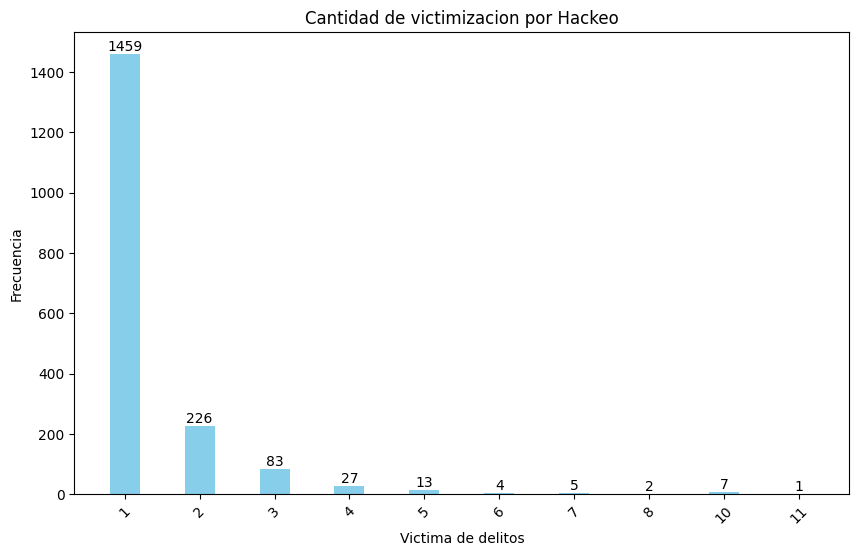

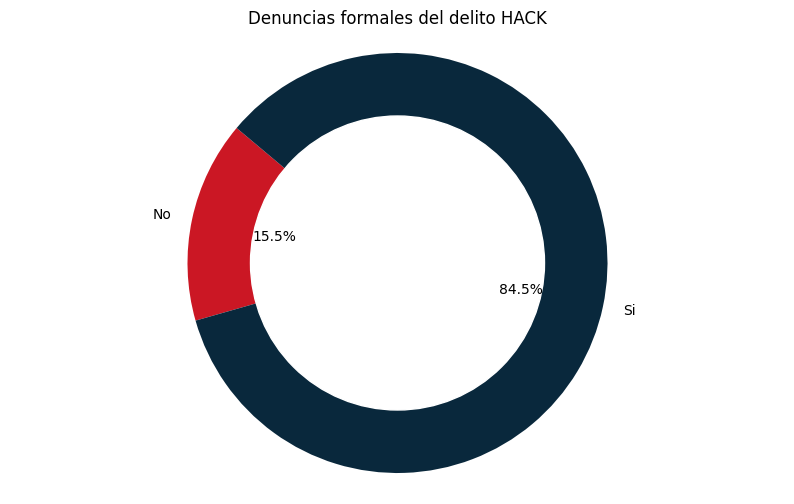

In [34]:
# Frecuencia de victimizacion por hackeo
count_delitos_hack = (df_hack["SCREEN_ROB_HACK_N"].astype(int)).value_counts().sort_index()
print(count_delitos_hack)

titulo = 'Cantidad de victimizacion por Hackeo'
etiqueta_x = 'Victima de delitos'
etiqueta_y = 'Frecuencia'

bar_plot(count_delitos_hack[:10], count_delitos_hack.index[:10], titulo, etiqueta_x, etiqueta_y)

# Porcentaje de denuncias formales del delito
count_denuncias = df_hack["HACK_DENUNCIAS"].value_counts().sort_index()

# Crear grafico de torta
labels = ["No", "Si"]
title = 'Denuncias formales del delito HACK'

plt.figure(figsize=(10, 6))
plt.pie(count_denuncias.values[:2], labels=labels, autopct='%1.1f%%', colors={"#09283CFF", "#CB1724FF"}, startangle=140)
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')
plt.title(title)
plt.show()

### Caracterizacion del delito

Basado en `1.6.2.15. Caracterización: hackeo de correo o redes sociales`

In [35]:
display(df_hack)

,SCREEN_ROB_HACK,SCREEN_ROB_HACK_N,HACK_DENUNCIAS,HACK_DENUNCIAS_N,HACK_PERSONAL,HACK_PERSONAL_N,HACK_QUIEN__0,HACK_MES,HACK_CUENTA,HACK_TIEMPO_RES,...,HACK_ACCION_POLICIAL,HACK_CONTACTO_MP,HACK_CONT_MP_MOT__1,HACK_CONT_MP_MOT__2,HACK_CONT_MP_MOT__3,HACK_CONT_MP_MOT__4,HACK_CONT_MP_MOT__5,HACK_CONT_MP_MOT__88,HACK_CONT_MP_MOT__99,HACK_MOTIV_NO_DEN
380,1.0,1.0,1.0,1.0,1.0,1.0,3.0,14.0,1.0,8.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0
408,1.0,3.0,1.0,3.0,1.0,3.0,2.0,10.0,1.0,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0
436,1.0,3.0,2.0,0.0,1.0,3.0,3.0,2.0,1.0,6.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
526,1.0,1.0,2.0,0.0,1.0,1.0,1.0,14.0,1.0,2.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
575,1.0,1.0,2.0,0.0,1.0,1.0,1.0,8.0,1.0,1.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146179,1.0,1.0,1.0,1.0,2.0,0.0,2.0,10.0,1.0,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0
146194,1.0,1.0,2.0,0.0,2.0,0.0,4.0,7.0,1.0,5.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
146207,1.0,2.0,2.0,0.0,2.0,0.0,2.0,10.0,1.0,1.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
146280,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.0,1.0,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0


In [ ]:
# # exportar el dataframe a un archivo CSV
# df_hack.to_csv("hackeo.csv", index=False)
# # exportar df_hack.isna().sum() en un texto
# with open("hackeo_isna.txt", "w") as txt:
#     txt.write(str(df_hack.isna().sum()))

In [ ]:
# exportar el dataframe a un archivo CSV
df_hack.to_csv("hackeo.csv", index=False)
# exportar df_hack.isna().sum() en un texto
with open("hackeo_isna.txt", "w") as txt:
    txt.write(str(df_hack.isna().sum()))

--- NSE vs. Percepción de Aumento en el Barrio ---
Distribución porcentual de Percepción de Aumento (Barrio) por NSE:


P_AUMENTO_BARRIO,Aumentó,Se mantuvo,Disminuyó
rph_nse,,,
NSE Alto,52.092177,41.570649,6.337174
NSE Bajo,50.684519,43.413122,5.902359
NSE Medio,52.655586,42.395009,4.949405


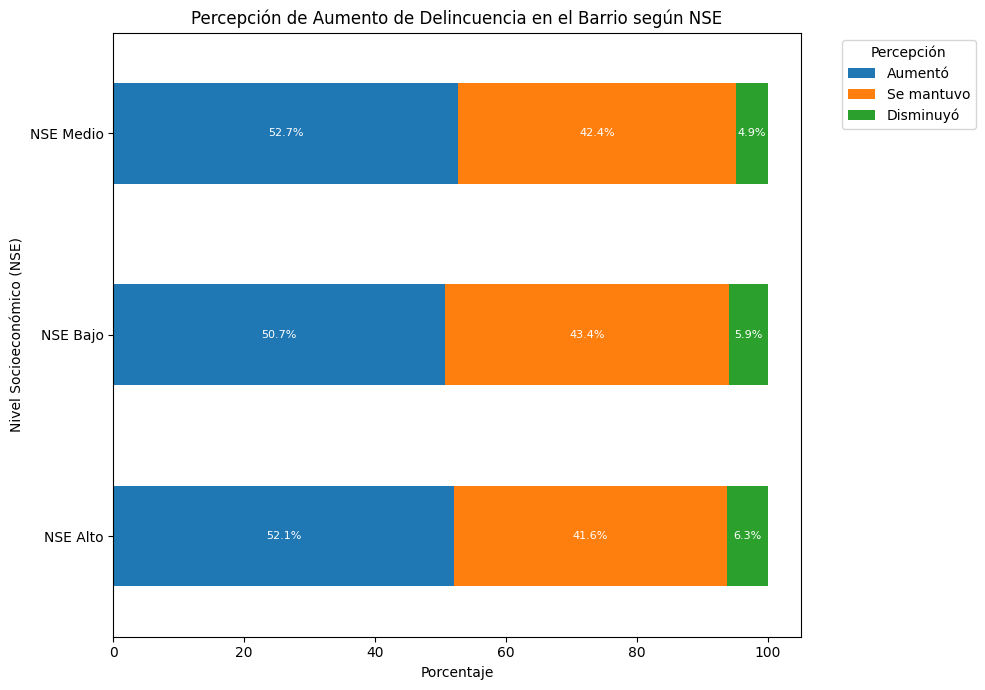

In [41]:
# --- NSE vs. Percepción de Aumento en el Barrio ---
print("--- NSE vs. Percepción de Aumento en el Barrio ---")

# Seleccionar columnas relevantes y copiar para evitar SettingWithCopyWarning
df_nse_percep = df_enusc[['rph_nse', 'P_AUMENTO_BARRIO']].copy()

# Eliminar filas donde P_AUMENTO_BARRIO no sea 1, 2 o 3 (excluye No sabe/No responde)
# y donde rph_nse no sea 1, 2 o 3
df_nse_percep = df_nse_percep[df_nse_percep['P_AUMENTO_BARRIO'].isin([1, 2, 3])]
df_nse_percep = df_nse_percep[df_nse_percep['rph_nse'].isin([1, 2, 3])]

# Renombrar valores numéricos a etiquetas descriptivas
nse_labels = {
    1: "NSE Bajo",
    2: "NSE Medio",
    3: "NSE Alto"
}
aumento_labels = {
    1: "Aumentó",
    2: "Se mantuvo",
    3: "Disminuyó"
}
df_nse_percep['rph_nse'] = df_nse_percep['rph_nse'].replace(nse_labels)
df_nse_percep['P_AUMENTO_BARRIO'] = df_nse_percep['P_AUMENTO_BARRIO'].replace(aumento_labels)

# Crear tabla de frecuencias cruzadas normalizada por filas (índice = NSE)
tabla_nse = pd.crosstab(df_nse_percep['rph_nse'], df_nse_percep['P_AUMENTO_BARRIO'], normalize='index') * 100

# Ordenar columnas para el gráfico
orden_columnas_nse = ["Aumentó", "Se mantuvo", "Disminuyó"]
tabla_nse = tabla_nse[orden_columnas_nse]

print("Distribución porcentual de Percepción de Aumento (Barrio) por NSE:")
display(tabla_nse)

# Gráfico de barras apiladas horizontales
ax = tabla_nse.plot(kind='barh', stacked=True, figsize=(10, 7))

plt.xlabel("Porcentaje")
plt.ylabel("Nivel Socioeconómico (NSE)")
plt.title("Percepción de Aumento de Delincuencia en el Barrio según NSE")
plt.legend(title="Percepción", bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda fuera
plt.tight_layout()

# Añadir etiquetas de porcentaje dentro de las barras (puede ser complejo si hay muchas barras pequeñas)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='white', fontsize=8)

plt.show()

### Percepción Barrio vs. Dejar de Salir de Noche

--- Percepción Barrio vs. Dejar de Salir de Noche  ---
Distribución porcentual de Dejar de Salir de Noche según Percepción (Barrio):


P_MOD_ACTIVIDADES_8,Sí dejó de salir,No dejó de salir
P_AUMENTO_BARRIO,,
Aumentó,74.734043,25.265957
Se mantuvo,52.407496,47.592504
Disminuyó,43.586651,56.413349


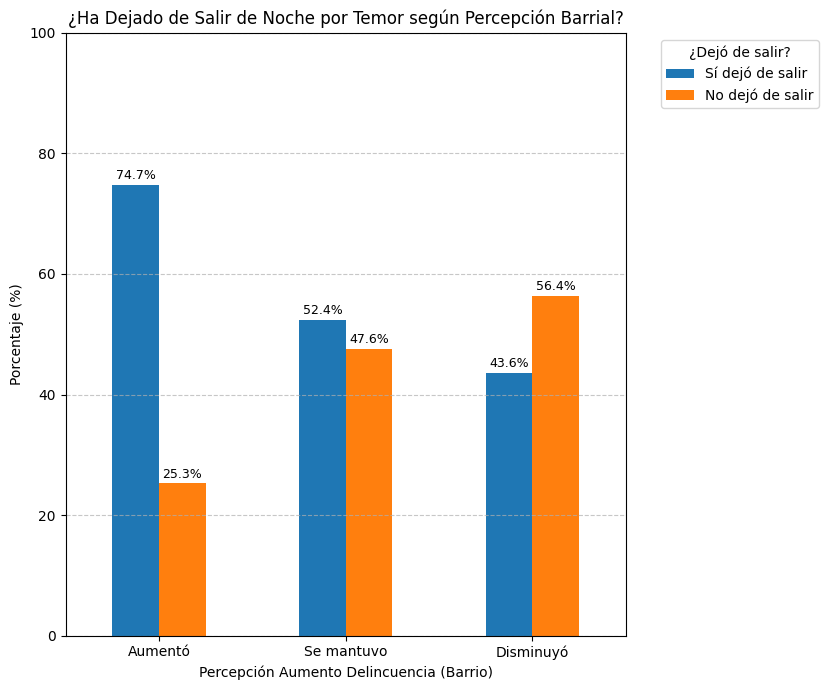

In [ ]:
# --- Percepción Barrio vs. Dejar de Salir de Noche
# Seleccionar columnas relevantes y copiar
df_percep_salir = df_enusc[['P_AUMENTO_BARRIO', 'P_MOD_ACTIVIDADES_8']].copy()

# Filtrar respuestas válidas (1, 2, 3 para percepción; 1, 2 para actividad)
df_percep_salir = df_percep_salir[df_percep_salir['P_AUMENTO_BARRIO'].isin([1, 2, 3])]
df_percep_salir = df_percep_salir[df_percep_salir['P_MOD_ACTIVIDADES_8'].isin([1, 2])]

# Renombrar valores numéricos a etiquetas
aumento_labels = {
    1: "Aumentó",
    2: "Se mantuvo",
    3: "Disminuyó"
}
mod_actividad_labels = {
    1: "Sí dejó de salir",
    2: "No dejó de salir"
}
df_percep_salir['P_AUMENTO_BARRIO'] = df_percep_salir['P_AUMENTO_BARRIO'].replace(aumento_labels)
df_percep_salir['P_MOD_ACTIVIDADES_8'] = df_percep_salir['P_MOD_ACTIVIDADES_8'].replace(mod_actividad_labels)

# Crear tabla de frecuencias cruzadas normalizada por filas (índice = Percepción Barrio)
tabla_salir = pd.crosstab(df_percep_salir['P_AUMENTO_BARRIO'], df_percep_salir['P_MOD_ACTIVIDADES_8'], normalize='index') * 100

# Ordenar filas y columnas si es necesario
orden_filas_salir = ["Aumentó", "Se mantuvo", "Disminuyó"]
orden_columnas_salir = ["Sí dejó de salir", "No dejó de salir"]
# Usar .loc para asegurar el orden de filas y columnas
tabla_salir = tabla_salir.reindex(index=orden_filas_salir, columns=orden_columnas_salir, fill_value=0)


print("Distribución porcentual de Dejar de Salir de Noche según Percepción (Barrio):")
display(tabla_salir) # Muestra la tabla con los porcentajes


# Gráfico de Barras Agrupadas Verticales
ax = tabla_salir.plot(kind='bar', stacked=False, figsize=(10, 7), rot=0) # kind='bar', stacked=False

plt.xlabel("Percepción Aumento Delincuencia (Barrio)")
plt.ylabel("Porcentaje (%)") # El eje Y ahora es el porcentaje
plt.title("¿Ha Dejado de Salir de Noche por Temor según Percepción Barrial?")
plt.legend(title="¿Dejó de salir?", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100) # Establecer límite del eje Y en 100%
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir líneas de cuadrícula horizontales

# Añadir etiquetas de porcentaje sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2, fontsize=9) # Ajustar padding/posición

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar layout para que la leyenda no se solape
plt.show()

--- Scatter Plot: Victimización Hogar vs. Percepción de Aumento (por Comuna) ---


enc_rpc
1101    45.432099
1107    49.270073
1401    28.723404
2101    27.205882
2201    37.417943
Name: Tasa Victimizacion Hogar (%), dtype: float64

enc_rpc
1101    79.378882
1107    86.605505
1401    76.756757
2101    90.159902
2201    92.997812
Name: Tasa Percibe Aumento (%), dtype: float64

Tasas combinadas por comuna (primeras filas):


,Tasa Victimizacion Hogar (%),Tasa Percibe Aumento (%)
enc_rpc,,
1101,45.432099,79.378882
1107,49.270073,86.605505
1401,28.723404,76.756757
2101,27.205882,90.159902
2201,37.417943,92.997812


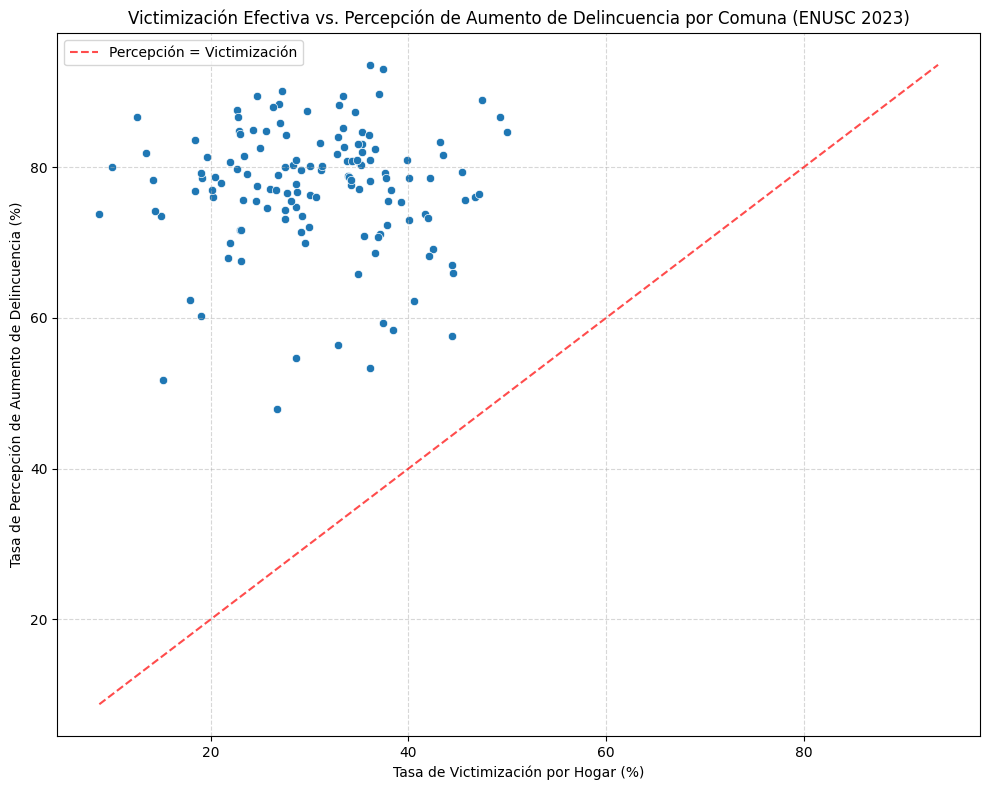

Coeficiente de correlación de Pearson entre tasas comunales: -0.007


In [39]:
# --- Análisis Central: Scatter Plot Victimización vs. Percepción ---
print("--- Scatter Plot: Victimización Hogar vs. Percepción de Aumento (por Comuna) ---")

# Asegurarse de tener las columnas necesarias y eliminar NaNs si es necesario en ellas
cols_necesarias = ['enc_rpc', 'VH_DC', 'P_AUMENTO_COM']
df_scatter = df_enusc[cols_necesarias].dropna(subset=cols_necesarias).copy()

# VH_DC = 1 si el hogar fue victimizado, 0 si no. La media es la proporción.
tasa_victimizacion_hogar = df_scatter.groupby('enc_rpc')['VH_DC'].mean() * 100
tasa_victimizacion_hogar = tasa_victimizacion_hogar.rename('Tasa Victimizacion Hogar (%)')
display(tasa_victimizacion_hogar.head())

# --- Calcular Tasa de Percepción de Aumento por Comuna ---
# Filtrar solo respuestas válidas para P_AUMENTO_COM (1, 2, 3)
df_percep_com = df_scatter[df_scatter['P_AUMENTO_COM'].isin([1, 2, 3])].copy()
# Crear indicador binario: 1 si P_AUMENTO_COM es 1 ("Aumentó"), 0 en otro caso
df_percep_com['Percibe_Aumento'] = (df_percep_com['P_AUMENTO_COM'] == 1).astype(int)
# Calcular la proporción que percibe aumento por comuna
tasa_percepcion_aumento = df_percep_com.groupby('enc_rpc')['Percibe_Aumento'].mean() * 100
tasa_percepcion_aumento = tasa_percepcion_aumento.rename('Tasa Percibe Aumento (%)')
display(tasa_percepcion_aumento.head())

# --- Combinar las tasas en un solo DataFrame ---
df_comunal = pd.merge(tasa_victimizacion_hogar, tasa_percepcion_aumento, left_index=True, right_index=True)
print("Tasas combinadas por comuna (primeras filas):")
display(df_comunal.head())

# --- Crear el Scatter Plot ---
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_comunal, x='Tasa Victimizacion Hogar (%)', y='Tasa Percibe Aumento (%)')

# Añadir una línea diagonal (y=x) para referencia visual
# Si un punto está por encima, la percepción es mayor que la victimización; si está por debajo, es menor.
max_val = max(df_comunal['Tasa Victimizacion Hogar (%)'].max(), df_comunal['Tasa Percibe Aumento (%)'].max())
min_val = min(df_comunal['Tasa Victimizacion Hogar (%)'].min(), df_comunal['Tasa Percibe Aumento (%)'].min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', alpha=0.7, label='Percepción = Victimización')

plt.title('Victimización Efectiva vs. Percepción de Aumento de Delincuencia por Comuna (ENUSC 2023)')
plt.xlabel('Tasa de Victimización por Hogar (%)')
plt.ylabel('Tasa de Percepción de Aumento de Delincuencia (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# --- Calcular Correlación ---
correlacion = df_comunal['Tasa Victimizacion Hogar (%)'].corr(df_comunal['Tasa Percibe Aumento (%)'], method='pearson') 
print(f"Coeficiente de correlación de Pearson entre tasas comunales: {correlacion:.3f}")